# Monte Carlo Racetrack problem

Notes: 
1. https://stats.stackexchange.com/questions/358047/why-does-off-policy-monte-carlo-control-only-learn-from-the-tails-of-episodes/358114

In [3]:
import numpy as np
import random
from PIL import Image, ImageDraw
from IPython.display import HTML
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import tqdm
%matplotlib inline

In [4]:
TRACKS = {

  'RACETRACK1': np.array([
    [0, 0, 0, 0, 0, 3],
    [0, 0, 0, 0, 0, 3],
    [0, 0, 0, 0, 0, 3],
    [0, 0, 0, 1, 1, 1],
    [0, 0, 0, 1, 1, 1],
    [0, 0, 0, 1, 1, 1],
    [2, 2, 2, 1, 1, 1]

  ], dtype=np.int32),

  'RACETRACK2': np.array([
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]
  ], dtype=np.int32),

  'RACETRACK3': np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
  ], dtype=np.int32)

}

### Define the racetrack environment

In [5]:
class RaceTrackEnv:
    def __init__(self,racetrack):
        self.racetrack=racetrack.T
        #Actions are possible increments to velocity
        self.actions=[(1,1),(-1,1),(-1,0),(-1,-1),(1,0),(0,1),(0,0),(0,-1),(1,-1)]
        self.action_to_idx={a:i for i, a in enumerate(self.actions)}
        self.reset()
    
    def get_player_start_state(self):
        start_states=np.argwhere(self.racetrack==2)
        return start_states[random.randint(0,start_states.shape[0]-1)]
    
    def get_state_shape(self):
        return (self.racetrack.shape[0],self.racetrack.shape[1],5,5)
    
    def reset(self):
        self.player_pos=self.get_player_start_state()
        self.player_velocity=[0,0] #Player horizontal and vertical velocity
    
    def get_possible_actions(self):
        possible_actions=[]
        state=self.racetrack[self.player_pos[0],self.player_pos[1]]
        for act in self.actions:
            act_new_h=self.player_velocity[0]+act[0]
            act_new_v=self.player_velocity[1]+act[1]
            if (act_new_h>=0 and act_new_v>=0) and (act_new_h<5 and act_new_v<5) and \
                    (act_new_h==0 and act_new_v==0 and state==2)==False:
                possible_actions.append(act)
        return possible_actions
    
    
    def get_current_state_tuple(self):
        return (self.player_pos[0],self.player_pos[1],self.player_velocity[0],self.player_velocity[1])
        
    def step(self,action,noise=True):
        """
            Follow an eps-greedy policy and take a timestep.
        """
        #Follow an action move to next step and generate reward
        if noise and random.random()<0.1:
            action=(0,0) 
        self.player_velocity[0]+=action[0]
        self.player_velocity[1]+=action[1]
        
        self.player_velocity=np.clip(self.player_velocity,0,4)
        self.player_pos[0]=min(self.player_velocity[0]+self.player_pos[0],self.racetrack.shape[0]-1)
        #Velocity is -j^
        self.player_pos[1]=max(self.player_pos[1]-self.player_velocity[1],0)
        next_state_type=self.racetrack[self.player_pos[0],self.player_pos[1]]
        terminal=False
        if next_state_type==1:
            self.player_velocity=[0,0]
            self.player_pos=self.get_player_start_state()
            reward=-50 #Penalty for hitting
        else:
            reward=-1
        #Return reward and state of the player (3 is Terminal state)
        next_state=self.get_current_state_tuple()
        if next_state_type==3:
            terminal=True
        return reward,next_state,terminal
        

    def render_state(self,box_size=15):
        h,w=self.racetrack.shape
        img = Image.new("RGB", ((h)*box_size, (w)*box_size))
        img1 = ImageDraw.Draw(img) 
        for x in range(h):
            for y in range(w):
                if self.racetrack[x,y]==0:
                    img1.rectangle(((x*box_size,y*box_size),((x+1)*box_size,(y+1)*box_size)),
                              fill ="#ffffff", outline ="blue")
                if self.racetrack[x,y]==2:
                    img1.rectangle(((x*box_size,y*box_size),((x+1)*box_size,(y+1)*box_size)),
                              fill ="red", outline ="blue")
                if self.racetrack[x,y]==3:
                    img1.rectangle(((x*box_size,y*box_size),((x+1)*box_size,(y+1)*box_size)),
                              fill ="green", outline ="blue")
        x,y=self.player_pos
        img1.rectangle(((x*box_size,y*box_size),((x+1)*box_size,(y+1)*box_size)),
                              fill ="orange", outline ="black")
        return img

In [6]:
def frames_to_html5_ani(frames):
    fig = plt.figure(figsize=(5,5))
    plt.axis('off')
    frames_im=[[plt.imshow(image, animated=True)] for image in frames]
    ani = animation.ArtistAnimation(fig, frames_im, interval=1000, blit=True, repeat_delay=1000)
    return HTML(ani.to_html5_video())

### Train using Monte Carlo off policy control

**Utility functions:**

In [7]:
def eps_greedy(racetrack,pi,epsilon):
    current_state=racetrack.get_current_state_tuple()
    possible_actions=racetrack.get_possible_actions()
    act_len=len(possible_actions)
    if random.random()<=epsilon:
        return random.choice(possible_actions),(epsilon/act_len)
    else:
        return racetrack.actions[pi[current_state]],(1-epsilon+(epsilon/act_len))

In [8]:
def run_episode(racetrack,pi,epsilon,generate_animation=False,noise=True):
    racetrack.reset()
    state_action_reward_prob=[]
    frames=[]
    while True:
        current_state=racetrack.get_current_state_tuple()
        if generate_animation: frames.append(racetrack.render_state())
        next_action,prob_action=eps_greedy(racetrack,pi,epsilon)
        reward,next_state,terminal=racetrack.step(next_action,noise=noise)
        state_action_reward_prob.append((current_state,next_action,reward,prob_action))
        if terminal: break
    #Add terminal state reward: 0
    state_action_reward_prob.append((next_state,[],-1,0))
    if generate_animation: frames.append(racetrack.render_state())
    return state_action_reward_prob,frames

**Train the model**

In [17]:
racetrack=RaceTrackEnv(TRACKS['RACETRACK2'])
epsilon=0.1
episodes_to_train=50000
gamma=0.8

In [18]:
#Train logic
def train_model(racetrack,epsilon,gamma,episodes_to_train):
    Q=np.random.random(size=(*racetrack.get_state_shape(),9))-100
    C=np.zeros(shape=(*racetrack.get_state_shape(),9))
    pi=np.zeros(shape=(racetrack.get_state_shape()),dtype=np.uint8)

    reward_values=[]
    for i in tqdm.tqdm(range(episodes_to_train)):
        #Generate an episode by following an eps greedy policy with pi (b)
        state_action_reward_prob,_=run_episode(racetrack,pi,epsilon)
        #Loop through the episode and update Q values
        G=0
        W=1
        rewards_sum=sum([r for _,_,r,_ in state_action_reward_prob])
        reward_values.append(rewards_sum)
        for t in range(len(state_action_reward_prob)-2,-1,-1): #Run from the non terminal state to this state
            _,_,R_tplus1,_=state_action_reward_prob[t+1]
            G=gamma*G+R_tplus1
            S_t,A_t,R_t,b_t=state_action_reward_prob[t]
            A_t=racetrack.action_to_idx[A_t]
            C[(*S_t,A_t)]+=W
            Q[(*S_t,A_t)]=Q[(*S_t,A_t)]+(W/C[(*S_t,A_t)])*(G-Q[(*S_t,A_t)])
            pi[S_t]=Q[S_t].argmax()
            if A_t!=pi[S_t]: break
            W=W*(1/b_t)
    return pi,reward_values

In [20]:
pi,reward_values=train_model(racetrack,epsilon,gamma,episodes_to_train)

100%|██████████| 50000/50000 [00:32<00:00, 1534.53it/s]


**Plot Rewards vs Episodes**

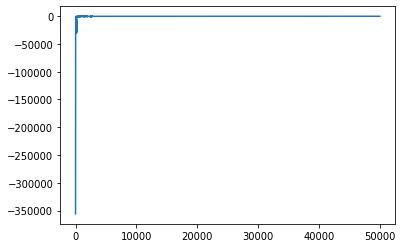

In [21]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w
reward_values=moving_average(reward_values,10)
plt.plot(range(len(reward_values)),reward_values)

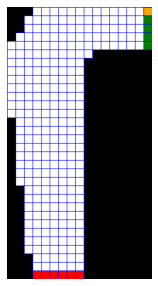

In [32]:
state_action_reward_prob,frames=run_episode(racetrack,pi,0,generate_animation=True,noise=False)
frames_to_html5_ani(frames)

In [35]:
state_action_reward_prob

[((3, 31, 0, 0), (0, 1), -1, 1.0),
 ((3, 30, 0, 1), (0, 1), -1, 1.0),
 ((3, 28, 0, 2), (1, 1), -1, 1.0),
 ((4, 25, 1, 3), (-1, 1), -1, 1.0),
 ((4, 21, 0, 4), (1, 0), -1, 1.0),
 ((5, 17, 1, 4), (0, 0), -1, 1.0),
 ((6, 13, 1, 4), (0, 0), -1, 1.0),
 ((7, 9, 1, 4), (1, 0), -1, 1.0),
 ((9, 5, 2, 4), (1, -1), -1, 1.0),
 ((12, 2, 3, 3), (1, 1), -1, 1.0),
 ((16, 0, 4, 4), [], 0, 0)]

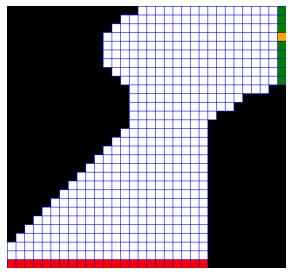